<a href="https://colab.research.google.com/github/adhuresau/adhuresau/blob/main/America_on_Tech_Data_Science_Fellowship_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🗓 Week 6 Lesson Plan — Importing Files & Python Concept Review

America On Tech | Instructor: Gizela Thomas

---

## ⏰ Agenda Overview
| Time | Activity |
|------|-----------|
| **15 min** | Check-In |
| **20 min** | Live Lecture — *Importing Files with Python* |
| **25 min** | Breakouts — DataCamp practice (*Intro to Flat Files*, *Using NumPy to Import Flat Files*) |
| **10 min** | Break ☕ |
| **25 min** | Python Key Concept Review (*Subsetting, .loc, groupby, saving CSVs*) |
| **15 min** | Kahoot! |
---

## 🎯 Learning Goals
By the end of class, students should be able to:
- Import data from `.txt` and `.csv` files using **Python**, **NumPy**, and **pandas**
- Subset and index DataFrames using `[]` and `.loc[]`
- Aggregate data with `groupby()` and calculate new metrics
- Save cleaned data to a `.csv` file using `to_csv()`
- Understand how all these steps connect in a basic data workflow


### Learning Block 1

# 🧭 Introduction
In data science, your first step is often **getting the data into Python**.  
This lesson focuses on *flat files* (like `.txt` and `.csv`) — some of the simplest and most common file types used to store data.

We'll practice three ways to import data:
1. Using **basic Python** (`open()` and `with open()`)
2. Using **NumPy** for numeric data
3. Using **pandas** for mixed data (numbers + text)
markdown
Copy code
# 📂 What Is a Flat File?

A **flat file** is a *plain-text* file that stores tabular data — one record (row) per line, and fields (columns) separated by a **delimiter** such as a comma `,` or tab `\t`.

Examples:

| Example File | Content |
|---------------|----------|
| **titanic.csv** | `Name,Age,Sex\nBraund,22,male` |
| **scores.txt** | `Student\tScore\nAlex\t95` |

Flat files are used everywhere — from Kaggle datasets to simple exports from Excel or Google Sheets.

📘 *Reference: DataCamp “Flat Files – titanic.csv” :contentReference[oaicite:0]{index=0}*
markdown
Copy code
# 🔡 Common Data Types in Flat Files

Each column in a flat file can represent different types of data:

| Type | Example | Description |
|------|----------|-------------|
| **String (`str`)** | `"Braund, Mr. Owen Harris"` | Text / words |
| **Integer (`int`)** | `22`, `1` | Whole numbers |
| **Float (`float`)** | `7.25`, `71.3` | Decimal numbers |
| **Boolean (`bool`)** | `True`, `False` | Logical values |
| **Missing (`NaN`)** | Empty cell or `NaN` | No data present |


📘 *Reference: DataCamp “Mixed datatypes – titanic.csv” :contentReference[oaicite:1]{index=1}*
python

In [1]:
# 🧱 STEP 1: Opening Text Files with Python
# ----------------------------------------

# Let's create a small fake text file to simulate a real dataset
text_data = """Name,Age,Occupation
Alice,24,Engineer
Ben,30,Designer
Carla,28,Teacher
"""
with open("people.txt", "w") as file:
    file.write(text_data)

# Now let's read it using the built-in open() function
file = open("people.txt", mode="r")   # 'r' stands for read mode
content = file.read()                 # reads the entire file as a string
file.close()                          # always close your file!
print(content)

Name,Age,Occupation
Alice,24,Engineer
Ben,30,Designer
Carla,28,Teacher



### 🧩 Understanding the `open()` Function

**Syntax:**
```python
file_object = open(filename, mode)
Common modes:

Mode	Meaning
'r'	Read (default)
'w'	Write (overwrites file)
'a'	Append (adds to existing file)
'rb' / 'wb'	Read/write binary files

Once opened, you can:

.read() – read the whole file as text

.readline() – read one line at a time

.readlines() – return all lines as a list

.close() – close the file to free memory


In [2]:
# 🧾 Reading Files Line by Line
with open("people.txt", "r") as file:
    for line in file:
        print(line.strip())  # strip() removes \n (new line character)

Name,Age,Occupation
Alice,24,Engineer
Ben,30,Designer
Carla,28,Teacher


💡 Using `with open()` automatically closes your file when done —
this is **best practice** in Python.



# 🧮 STEP 2: Importing Flat Files Using NumPy
NumPy is great for importing *numeric data* — such as arrays, sensor readings, or pixel intensities.

You’ll often use:
```python
np.loadtxt(filename, delimiter=",")


In [3]:
# Let's make a fake numeric file (like MNIST or exam scores)
import numpy as np

numeric_data = """85,90,88
78,81,85
92,89,95"""
with open("scores.csv", "w") as f:
    f.write(numeric_data)

In [4]:
# Import using NumPy
data = np.loadtxt("scores.csv", delimiter=",")
print("NumPy Array:\n", data)

NumPy Array:
 [[85. 90. 88.]
 [78. 81. 85.]
 [92. 89. 95.]]


### ⚙️ NumPy `loadtxt()` Parameters

| Parameter | Description | Example |
|------------|--------------|----------|
| `delimiter` | Symbol separating values | `","` or `"\t"` |
| `skiprows` | Skip header lines | `skiprows=1` |
| `usecols` | Select columns by index | `usecols=[0,2]` |
| `dtype` | Set data type | `dtype=float` or `dtype=str` |

Example:
```python
data = np.loadtxt("scores.csv", delimiter=",", usecols=[0,2])
This reads only columns 0 and 2 (1st and 3rd columns).



🧠 **Quick Tip:**  
NumPy works best when your data is **purely numeric** — if your file includes strings (like names), switch to pandas instead!

# 🐼 STEP 3: Importing Flat Files Using pandas
pandas can handle files that include both numbers *and* text — it’s what data scientists use most often.
python

In [5]:
import pandas as pd

# Let’s reuse our people.txt file
df = pd.read_csv("people.txt")
df.head()

,Name,Age,Occupation
0,Alice,24,Engineer
1,Ben,30,Designer
2,Carla,28,Teacher


### 📊 Common pandas Import Options

| Parameter | Description | Example |
|------------|--------------|----------|
| `sep` | Delimiter (default `,`) | `sep="\t"` for tab files |
| `header` | Header row number | `header=None` for no header |
| `usecols` | Choose which columns to import | `usecols=["Name", "Occupation"]` |
| `nrows` | Import only the first n rows | `nrows=10` |
| `na_values` | Define missing value markers | `na_values=["NA", "missing"]` |

📘 *Reference: DataCamp “Importing using pandas” :contentReference[oaicite:4]{index=4}*
python

In [6]:
# Example: Select specific columns and handle missing data
mixed_data = """Name,Age,Occupation
Alice,24,Engineer
Ben,,Designer
Carla,28,Teacher"""
with open("people_missing.csv", "w") as f:
    f.write(mixed_data)

df = pd.read_csv("people_missing.csv", usecols=["Name", "Age"])
print("Preview of DataFrame:")
display(df)

print("\nColumn Data Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe(include='all'))

Preview of DataFrame:


,Name,Age
0,Alice,24.0
1,Ben,NaN
2,Carla,28.0



Column Data Types:
Name     object
Age     float64
dtype: object

Summary Statistics:
         Name        Age
count       3   2.000000
unique      3        NaN
top     Alice        NaN
freq        1        NaN
mean      NaN  26.000000
std       NaN   2.828427
min       NaN  24.000000
25%       NaN  25.000000
50%       NaN  26.000000
75%       NaN  27.000000
max       NaN  28.000000



# 💡 pandas vs NumPy Summary

| Feature | NumPy | pandas |
|----------|--------|--------|
| Ideal For | Numeric-only data | Mixed data (text + numbers) |
| Output Type | `ndarray` | `DataFrame` |
| Handles Missing Values | ❌ No | ✅ Yes |
| Read Function | `np.loadtxt()` | `pd.read_csv()` |
| Data Inspection | Manual | `.info()`, `.head()`, `.describe()` |

---






# 🎓 **Next:** Let’s move to our **DataCamp exercises!**  
We’ll do one problem **together live**, and then split into breakout rooms to finish the rest.


# ☕ 10-Minute Break

Take a quick stretch, refill water, or check in with your group.  
When we return — we’ll reinforce key Python fundamentals that connect to importing and working with data.

---

# 🧠 Python Concept Review — 20 Minutes

We'll cover:
1. **Subsetting Columns vs Rows**
2. **Indexing with `.loc[]`**
3. **Grouping Data (`groupby()`)**
4. **Saving Files (`.to_csv()`)**

> These examples mirror the DataCamp exercises you saw (e.g., *Subsetting columns* and *Subsetting rows*).

We'll create a small, realistic dataset with the columns used in the exercises:  
`state`, `region`, `individuals`, `family_members`.


In [7]:

import pandas as pd

homelessness = pd.DataFrame({
    "state": ["California","Oregon","Washington","Colorado","Utah","Arizona","Nevada","Idaho","Montana","New Mexico"],
    "region": ["Pacific","Pacific","Pacific","Mountain","Mountain","Mountain","Mountain","Mountain","Mountain","Mountain"],
    "individuals": [108000, 12000, 13500, 9200, 3600, 11500, 7200, 1800, 1400, 3100],
    "family_members": [850, 600, 950, 1200, 400, 700, 300, 150, 90, 250]
})

homelessness.head()


,state,region,individuals,family_members
0,California,Pacific,108000,850
1,Oregon,Pacific,12000,600
2,Washington,Pacific,13500,950
3,Colorado,Mountain,9200,1200
4,Utah,Mountain,3600,400



## 🧩 Subsetting **Columns**

Square brackets `[]` let you pick only the columns you need, in the order you want.

**Syntax recap**  
- One column → `df["col"]` → returns a **Series**  
- Multiple columns → `df[["col_a", "col_b"]]` → returns a **DataFrame**  
- Order matters: `df[["b", "a"]]` rearranges columns

---

### Exercise 1
Create a **Series** called `individuals` that contains only the `individuals` column of `homelessness`.


In [8]:

# One column -> Series
individuals = homelessness["individuals"]
type(individuals), individuals.head()


(pandas.core.series.Series,
 0    108000
 1     12000
 2     13500
 3      9200
 4      3600
 Name: individuals, dtype: int64)


### Exercise 2
Create a **DataFrame** called `state_fam` that contains only the `state` and `family_members` columns of `homelessness`, **in that order**.


In [9]:

state_fam = homelessness[["state", "family_members"]]
state_fam.head()


,state,family_members
0,California,850
1,Oregon,600
2,Washington,950
3,Colorado,1200
4,Utah,400



## 🔍 Subsetting **Rows** (Filtering)

Use **boolean conditions** inside `[]` to keep only rows that match your criteria.

**Common patterns**
```python
df[df["col"] > 10]
df[(df["a"] > 1) & (df["b"] == "x")]   # AND
df[(df["a"] > 1) | (df["b"] == "x")]   # OR
df[~(df["b"] == "x")]                  # NOT
df[df["col"].isin(["x", "y"])]         # membership
```
> Always use parentheses around each condition when combining with `&` or `|`.



### Exercise 3
Filter `homelessness` for cases where the number of **`individuals` is greater than 10,000**, assigning to `ind_gt_10k`. Print the result.


In [10]:

ind_gt_10k = homelessness[homelessness["individuals"] > 10000]
ind_gt_10k


,state,region,individuals,family_members
0,California,Pacific,108000,850
1,Oregon,Pacific,12000,600
2,Washington,Pacific,13500,950
5,Arizona,Mountain,11500,700



### Exercise 4
Filter `homelessness` for cases where **`family_members` is less than 1,000** **AND** the `region` is **`"Pacific"`**, assigning to `fam_lt_1k_pac`. Print the result.


In [11]:

fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]
fam_lt_1k_pac


,state,region,individuals,family_members
0,California,Pacific,108000,850
1,Oregon,Pacific,12000,600
2,Washington,Pacific,13500,950


### ⚠️ Common Pitfalls
- Forgetting parentheses in combined conditions: `df[a > 1 & b == "x"]` ❌  
  Correct: `df[(a > 1) & (b == "x")]` ✅  
- Expecting `df["col"]` to be a DataFrame (it’s a **Series**). Use `df[["col"]]` if you need a DataFrame.  
- Using `and`/`or` instead of `&`/`|` for element-wise comparisons.



## 🎯 Subsetting with `.loc[]`

`.loc[]` = **label-based** selection. It uses the *index labels* you see on the left side of a DataFrame.

**Why `.loc[]`?**  
- More readable than boolean chaining for many tasks  
- Works beautifully with indexes (including MultiIndex)  
- Supports lists of labels, label slices, and column selection

**Basic patterns**
```python
df.loc[label]                 # single row by label
df.loc[[label1, label2]]      # multiple labels
df.loc["start":"end"]         # label slice (inclusive)
df.loc[row_labels, col_labels]# rows & columns by label
```


We'll use a small, friendly dataset:

- Columns: `date`, `city`, `avg_temp`  
- We'll practice:
  - Sorting by **index** with `sort_index()`  
  - Selecting rows by **label** with `.loc[]` (single label, list of labels, and label slices)  
  - Selecting **rows & columns** using `.loc[row_labels, col_labels]`


In [12]:

import pandas as pd

temperatures_simple = pd.DataFrame({
    "date": pd.to_datetime([
        "2010-01-01","2010-02-01","2010-03-01",
        "2010-01-01","2010-02-01","2010-03-01"
    ]),
    "city": ["Boston","Boston","Boston","Denver","Denver","Denver"],
    "avg_temp": [0.8, 1.2, 4.0, -1.0, 1.1, 3.2]
})

temperatures_simple


,date,city,avg_temp
0,2010-01-01,Boston,0.8
1,2010-02-01,Boston,1.2
2,2010-03-01,Boston,4.0
3,2010-01-01,Denver,-1.0
4,2010-02-01,Denver,1.1
5,2010-03-01,Denver,3.2



## 🎯 Subsetting with `.loc[]` (labels)

`.loc[]` selects **by label** (the index values).  
Common patterns you’ll use all the time:

```python
df.loc[label]                 # single row (or rows if label repeats)
df.loc[[label1, label2]]      # multiple labels
df.loc["start":"end"]         # label slice (inclusive on both ends)
df.loc[row_labels, col_labels]# rows & columns by label
```


In [13]:

# We'll keep using the city-indexed DataFrame
city_idx = temperatures_simple.set_index("city").sort_index()

city_idx.head()

,date,avg_temp
city,,
Boston,2010-01-01,0.8
Boston,2010-02-01,1.2
Boston,2010-03-01,4.0
Denver,2010-01-01,-1.0
Denver,2010-02-01,1.1


In [14]:
# A) Single label -> all rows for 'Boston'
print("— .loc['Boston'] —")
print(city_idx.loc["Boston"])

— .loc['Boston'] —
             date  avg_temp
city                       
Boston 2010-01-01       0.8
Boston 2010-02-01       1.2
Boston 2010-03-01       4.0


In [15]:
# B) Multiple labels -> rows for 'Boston' and 'Denver'
print("\n— .loc[['Boston','Denver']] —")
print(city_idx.loc[["Boston","Denver"]])


— .loc[['Boston','Denver']] —
             date  avg_temp
city                       
Boston 2010-01-01       0.8
Boston 2010-02-01       1.2
Boston 2010-03-01       4.0
Denver 2010-01-01      -1.0
Denver 2010-02-01       1.1
Denver 2010-03-01       3.2


In [16]:
# C) Rows & columns by label -> only 'date' and 'avg_temp' for Boston
print("\n— .loc['Boston', ['date','avg_temp']] —")
print(city_idx.loc["Boston", ["date"]])


— .loc['Boston', ['date','avg_temp']] —
             date
city             
Boston 2010-01-01
Boston 2010-02-01
Boston 2010-03-01



## 🗓 Label Slices with Dates

When your **index is dates**, you can slice by date strings.  
Let’s index by `date` and grab a range using labels.


In [17]:

# Reindex by date to demonstrate date label slicing
date_idx = temperatures_simple.set_index("date").sort_index()

In [18]:
# D) Date slice (inclusive): from 2010-01-01 to 2010-02-01
print("— .loc['2010-01-01':'2010-02-01'] —")
print(date_idx.loc["2010-01-01":"2010-02-01"])


— .loc['2010-01-01':'2010-02-01'] —
              city  avg_temp
date                        
2010-01-01  Boston       0.8
2010-01-01  Denver      -1.0
2010-02-01  Boston       1.2
2010-02-01  Denver       1.1



### ⚠️ Tips & Pitfalls
- `.loc` uses **labels**, not positions. If you want positions, use `.iloc` (e.g., `df.iloc[0:3]`).  
- For combined boolean conditions, still use `&`/`|` with parentheses:  
  `df[(df["city"]=="Boston") & (df["avg_temp"]>1.0)]`  
- If your index isn’t what you expect, check with `df.index` or reset it: `df.reset_index()`.



## 🔢 Sorting by Index (row labels)

`DataFrame.sort_index()` orders rows by the **index** instead of a column.

**Steps:**
1. Set `city` as the index → `set_index("city")`  
2. Sort index ascending (A→Z) and descending (Z→A)


In [19]:

# 1) Set a simple index on 'city'
city_idx = temperatures_simple.set_index("city")

# 2a) Sort by index ascending (A→Z)
print("— sort_index ascending —")
print(city_idx.sort_index())

# 2b) Sort by index descending (Z→A)
print("\n— sort_index descending —")
print(city_idx.sort_index(ascending=False))


— sort_index ascending —
             date  avg_temp
city                       
Boston 2010-01-01       0.8
Boston 2010-02-01       1.2
Boston 2010-03-01       4.0
Denver 2010-01-01      -1.0
Denver 2010-02-01       1.1
Denver 2010-03-01       3.2

— sort_index descending —
             date  avg_temp
city                       
Denver 2010-01-01      -1.0
Denver 2010-02-01       1.1
Denver 2010-03-01       3.2
Boston 2010-01-01       0.8
Boston 2010-02-01       1.2
Boston 2010-03-01       4.0



##  Setup — `temperatures` and `temperatures_ind`

We’ll simulate a small temperatures dataset.  
- `temperatures` will be a regular DataFrame with columns: `date`, `country`, `city`, `avg_temp`.  
- `temperatures_ind` will be a **MultiIndex** on `["country", "city"]` for sorting-by-index practice.  
- `temperatures_city_index` will be indexed **only by `city`** for the `.loc[]` example that selects multiple cities.


In [20]:

import pandas as pd
import numpy as np

# A small reproducible dataset
temperatures = pd.DataFrame({
    "date": pd.to_datetime([
        "2010-01-01", "2010-02-01", "2010-03-01",
        "2010-01-01", "2010-02-01", "2010-03-01",
        "2010-01-01", "2010-02-01", "2010-03-01"
    ]),
    "country": ["United Kingdom","United Kingdom","United Kingdom",
                "France","France","France",
                "Italy","Italy","Italy"],
    "city": ["London","London","London",
             "Paris","Paris","Paris",
             "Rome","Rome","Rome"],
    "avg_temp": [6.1, 7.4, 8.3, 5.2, 6.0, 9.1, 7.0, 9.5, 13.0]
})

In [21]:
temperatures.head()

,date,country,city,avg_temp
0,2010-01-01,United Kingdom,London,6.1
1,2010-02-01,United Kingdom,London,7.4
2,2010-03-01,United Kingdom,London,8.3
3,2010-01-01,France,Paris,5.2
4,2010-02-01,France,Paris,6.0


In [22]:
# MultiIndex by country, city (like the exercise)
temperatures_ind = temperatures.set_index(["country","city"]).sort_index()

temperatures_ind.head()

date  avg_temp
country city                      
France  Paris 2010-01-01       5.2
        Paris 2010-02-01       6.0
        Paris 2010-03-01       9.1
Italy   Rome  2010-01-01       7.0
        Rome  2010-02-01       9.5

In [23]:

# City-only index for the .loc[] example (to select rows by city names)
temperatures_city_index = temperatures.set_index("city").sort_index()

temperatures_city_index.head()

,date,country,avg_temp
city,,,
London,2010-01-01,United Kingdom,6.1
London,2010-02-01,United Kingdom,7.4
London,2010-03-01,United Kingdom,8.3
Paris,2010-01-01,France,5.2
Paris,2010-02-01,France,6.0



## 🔢 Sorting by Index Values

`.sort_values()` orders rows by **column** values.  
`.sort_index()` orders rows by the **index** (row labels).

### ✅ Exercise A
1. **Sort** `temperatures_ind` by the index values.  
2. **Sort** by the index at the `"city"` level only.  
3. **Sort** by **ascending country** and **descending city**.


In [24]:
# 1) Sort by the entire MultiIndex (country, then city), both ascending

print(temperatures_ind.sort_index())

                            date  avg_temp
country        city                       
France         Paris  2010-01-01       5.2
               Paris  2010-02-01       6.0
               Paris  2010-03-01       9.1
Italy          Rome   2010-01-01       7.0
               Rome   2010-02-01       9.5
               Rome   2010-03-01      13.0
United Kingdom London 2010-01-01       6.1
               London 2010-02-01       7.4
               London 2010-03-01       8.3


In [25]:

# 2) Sort by the 'city' level of the MultiIndex only
print("\n— Sort by index level='city' —")
print(temperatures_ind.sort_index(level="city"))


— Sort by index level='city' —
                            date  avg_temp
country        city                       
United Kingdom London 2010-01-01       6.1
               London 2010-02-01       7.4
               London 2010-03-01       8.3
France         Paris  2010-01-01       5.2
               Paris  2010-02-01       6.0
               Paris  2010-03-01       9.1
Italy          Rome   2010-01-01       7.0
               Rome   2010-02-01       9.5
               Rome   2010-03-01      13.0


In [26]:
# 3) Sort by ascending country, then descending city
print("\n— Sort by country ASC, city DESC —")
print(temperatures_ind.sort_index(level=["country","city"], ascending=[True, False]))



— Sort by country ASC, city DESC —
                            date  avg_temp
country        city                       
France         Paris  2010-01-01       5.2
               Paris  2010-02-01       6.0
               Paris  2010-03-01       9.1
Italy          Rome   2010-01-01       7.0
               Rome   2010-02-01       9.5
               Rome   2010-03-01      13.0
United Kingdom London 2010-01-01       6.1
               London 2010-02-01       7.4
               London 2010-03-01       8.3



# 📦 GroupBy Review + Saving Files (`.to_csv`)

We'll practice the exact flow from your DataCamp screenshots:

1) Load an **airline bumping** dataset from CSV  
2) `groupby("airline")` and **sum** the yearly values  
3) Compute a **rate** (`bumps_per_10k`)  
4) Sort by that rate (descending)  
5) **Save** the result to CSV



## Create a small `airline_bumping.csv`

We’ll generate a mini dataset with the columns used in the exercise:  
`airline`, `year`, `nb_bumped`, `total_passengers`.


In [27]:

import pandas as pd

air = pd.DataFrame({
    "airline": [
        "DELTA AIR LINES","DELTA AIR LINES","UNITED AIRLINES","UNITED AIRLINES",
        "SOUTHWEST AIRLINES","SOUTHWEST AIRLINES","AMERICAN AIRLINES","AMERICAN AIRLINES",
        "JETBLUE AIRWAYS","JETBLUE AIRWAYS","ALASKA AIRLINES","ALASKA AIRLINES"
    ],
    "year": [2016,2017,2016,2017,2016,2017,2016,2017,2016,2017,2016,2017],
    "nb_bumped": [700, 679, 2100, 2067, 18000, 18585, 11000, 11115, 1500, 1475, 1400, 1392],
    "total_passengers": [100_000_000, 99_796_155, 70_000_000, 70_030_765,
                         228_000_000, 228_142_036, 197_000_000, 197_365_225,
                         27_000_000, 27_255_038, 36_000_000, 36_543_121]
})
air.to_csv("airline_bumping.csv", index=False)
air.head()


,airline,year,nb_bumped,total_passengers
0,DELTA AIR LINES,2016,700,100000000
1,DELTA AIR LINES,2017,679,99796155
2,UNITED AIRLINES,2016,2100,70000000
3,UNITED AIRLINES,2017,2067,70030765
4,SOUTHWEST AIRLINES,2016,18000,228000000



## 1) Load and preview


In [28]:

import pandas as pd
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())


              airline  year  nb_bumped  total_passengers
0     DELTA AIR LINES  2016        700         100000000
1     DELTA AIR LINES  2017        679          99796155
2     UNITED AIRLINES  2016       2100          70000000
3     UNITED AIRLINES  2017       2067          70030765
4  SOUTHWEST AIRLINES  2016      18000         228000000



## 2) Group by `airline` and **sum** across years

We keep only the numeric columns we want to aggregate: `nb_bumped` and `total_passengers`.


In [29]:

airline_totals = (
    airline_bumping
    .groupby("airline")[["nb_bumped","total_passengers"]]
    .sum()
)
airline_totals


,nb_bumped,total_passengers
airline,,
ALASKA AIRLINES,2792,72543121
AMERICAN AIRLINES,22115,394365225
DELTA AIR LINES,1379,199796155
JETBLUE AIRWAYS,2975,54255038
SOUTHWEST AIRLINES,36585,456142036
UNITED AIRLINES,4167,140030765



## 3) Create a **rate** column: `bumps_per_10k`

This expresses bumps **per 10,000 passengers** — easier to compare across airlines of different sizes.


In [30]:

airline_totals["bumps_per_10k"] = (
    airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10_000
)
airline_totals.round(3)


,nb_bumped,total_passengers,bumps_per_10k
airline,,,
ALASKA AIRLINES,2792,72543121,0.385
AMERICAN AIRLINES,22115,394365225,0.561
DELTA AIR LINES,1379,199796155,0.069
JETBLUE AIRWAYS,2975,54255038,0.548
SOUTHWEST AIRLINES,36585,456142036,0.802
UNITED AIRLINES,4167,140030765,0.298



## 4) Sort by the rate (descending)


In [31]:

airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)
airline_totals_sorted.round(3)


,nb_bumped,total_passengers,bumps_per_10k
airline,,,
SOUTHWEST AIRLINES,36585,456142036,0.802
AMERICAN AIRLINES,22115,394365225,0.561
JETBLUE AIRWAYS,2975,54255038,0.548
ALASKA AIRLINES,2792,72543121,0.385
UNITED AIRLINES,4167,140030765,0.298
DELTA AIR LINES,1379,199796155,0.069



## 5) Save to CSV

Use `DataFrame.to_csv("filename.csv", index=False)` to write a file.  
Set `index=True` if you want to keep the group labels as a column; otherwise reset first.


In [32]:

# Save the sorted table
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

# (Optional) quick sanity check: read it back
pd.read_csv("airline_totals_sorted.csv").head()


,airline,nb_bumped,total_passengers,bumps_per_10k
0,SOUTHWEST AIRLINES,36585,456142036,0.802053
1,AMERICAN AIRLINES,22115,394365225,0.560775
2,JETBLUE AIRWAYS,2975,54255038,0.548336
3,ALASKA AIRLINES,2792,72543121,0.384875
4,UNITED AIRLINES,4167,140030765,0.297577


### SQL JOINS Preview

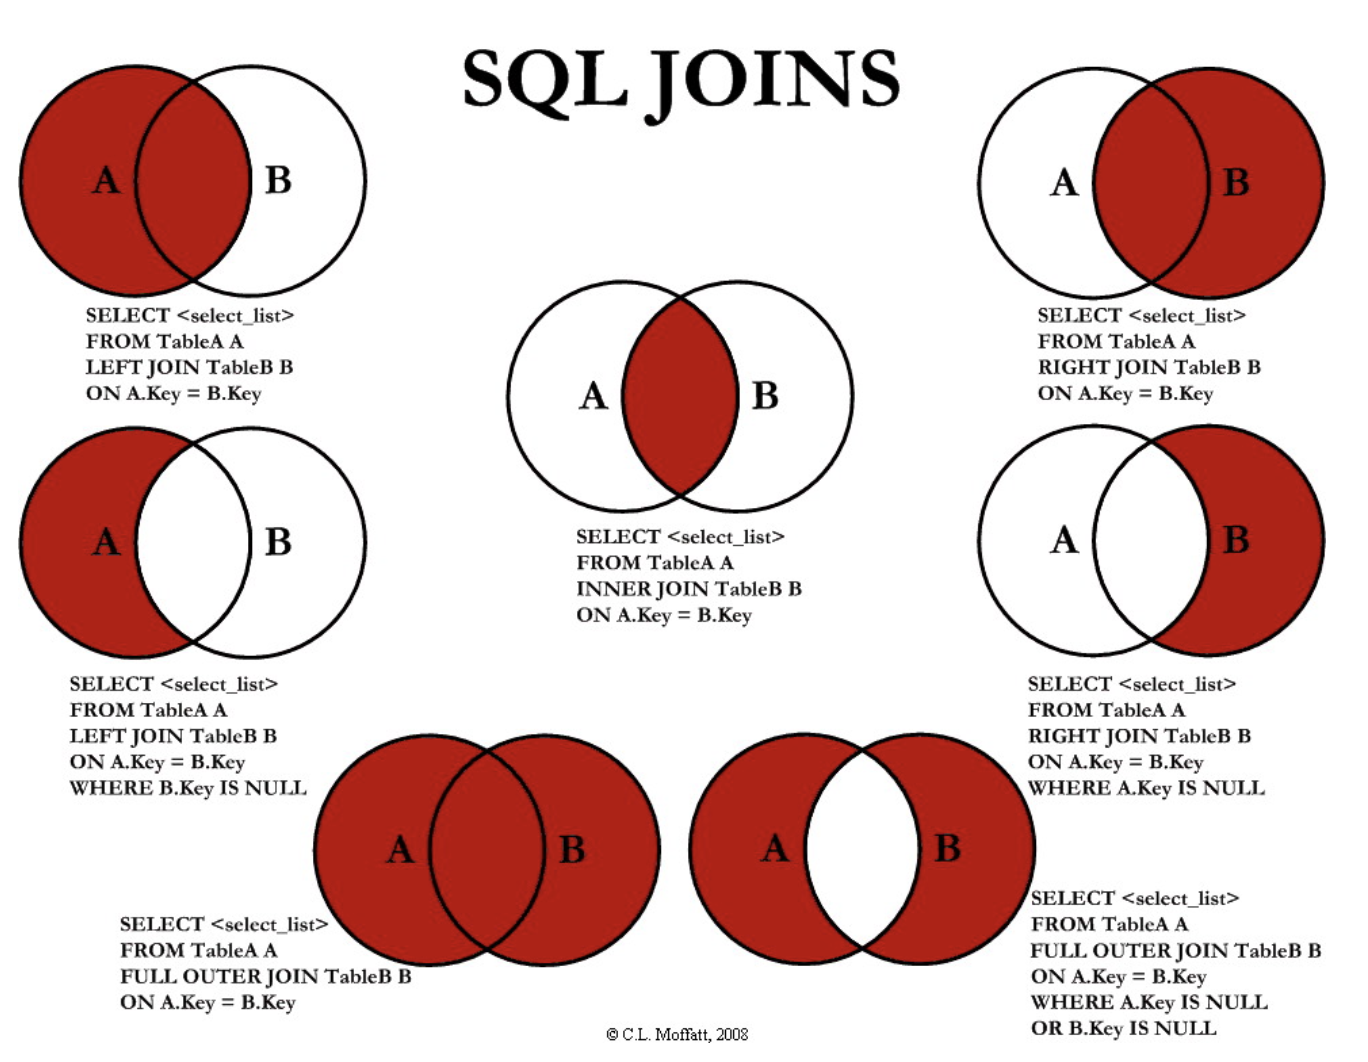